In [ ]:
!pip install jcopdl==1.1.6

  Preparing metadata (setup.py) ... done
  Created wheel for jcopdl: filename=jcopdl-1.1.6-py2.py3-none-any.whl size=14972 sha256=33fc4c45045f45da1cda831b990c547cccac1857fc2c73140fa4f4de27a34d44
  Stored in directory: /root/.cache/pip/wheels/30/a6/e6/544f8a7066617512c0227f32260e29d77032dd38392f69a085
Successfully built jcopdl


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/brain_tumor_dataset/train/

no  yes


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torch import nn, optim
from jcopdl.callback import Callback, set_config

Load and Spliting Data

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


bs = 64

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

img = datasets.ImageFolder("/content/drive/MyDrive/brain_tumor_dataset/train/", transform=transform)

train = int(0.8 * len(img))
test = len(img) - train
train, test = random_split(img, [train, test])


In [ ]:
len(img)

253

DataLoader

In [ ]:
trainloader = DataLoader(train, batch_size=bs)
testloader = DataLoader(test, batch_size=bs)

In [ ]:
feature, target = next(iter(trainloader))
feature.shape

torch.Size([64, 3, 128, 128])

CNN Architecture

In [ ]:
from jcopdl.layers import conv_block, linear_block

class BrainTumorDetectionCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv = nn.Sequential(
        conv_block(3, 8),
        conv_block(8, 16),
        conv_block(16, 32),
        conv_block(32, 64),
        nn.Flatten()
    )

    self.fc = nn.Sequential(
        linear_block(4096, 1024, dropout=0.1),
        linear_block(1024, 2, activation='lsoftmax')
    )

  def forward(self, x):
    x = self.conv(x)
    x = self.fc(x)
    return x

In [ ]:
config = set_config({
    'batch_size': bs
})

Data Training

In [ ]:
model = BrainTumorDetectionCNN()
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='model_BrainTumorDetectionCNN')

In [ ]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer):
  if mode == 'train':
    model.train()
  elif mode == 'test':
    model.eval()
  cost = correct = 0
  for feature, target in tqdm(dataloader, desc=mode.title()):
    output = model(feature)
    loss = criterion(output, target)

    if mode == 'train':
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    cost += loss.item() * feature.shape[0]
    correct += (output.argmax(1) == target).sum().item()
  cost = cost / len(dataset)
  acc = correct / len(dataset)
  return cost, acc

Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.6896 | Test_cost  = 0.6880 | Train_score = 0.5545 | Test_score = 0.5294 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.6728 | Test_cost  = 0.6872 | Train_score = 0.6535 | Test_score = 0.5294 |
==> EarlyStop patience =  1 | Best test_score: 0.5294


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.6725 | Test_cost  = 0.6845 | Train_score = 0.6337 | Test_score = 0.5294 |
==> EarlyStop patience =  2 | Best test_score: 0.5294


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.6405 | Test_cost  = 0.7028 | Train_score = 0.6337 | Test_score = 0.5294 |
==> EarlyStop patience =  3 | Best test_score: 0.5294


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.6169 | Test_cost  = 0.6641 | Train_score = 0.6337 | Test_score = 0.5294 |
==> EarlyStop patience =  4 | Best test_score: 0.5294


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.6016 | Test_cost  = 0.6452 | Train_score = 0.7030 | Test_score = 0.6275 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.5480 | Test_cost  = 0.6287 | Train_score = 0.7426 | Test_score = 0.6471 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.5323 | Test_cost  = 0.6324 | Train_score = 0.7475 | Test_score = 0.6471 |
==> EarlyStop patience =  1 | Best test_score: 0.6471


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.4967 | Test_cost  = 0.6157 | Train_score = 0.7673 | Test_score = 0.6667 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.4849 | Test_cost  = 0.6209 | Train_score = 0.7673 | Test_score = 0.6863 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.4680 | Test_cost  = 0.6110 | Train_score = 0.7871 | Test_score = 0.6863 |
==> EarlyStop patience =  1 | Best test_score: 0.6863


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.4601 | Test_cost  = 0.6273 | Train_score = 0.7871 | Test_score = 0.6863 |
==> EarlyStop patience =  2 | Best test_score: 0.6863


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.4406 | Test_cost  = 0.6283 | Train_score = 0.7921 | Test_score = 0.7059 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.4177 | Test_cost  = 0.6138 | Train_score = 0.8218 | Test_score = 0.7255 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.4082 | Test_cost  = 0.6332 | Train_score = 0.8366 | Test_score = 0.7255 |
==> EarlyStop patience =  1 | Best test_score: 0.7255


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.4057 | Test_cost  = 0.7387 | Train_score = 0.8119 | Test_score = 0.6863 |
==> EarlyStop patience =  2 | Best test_score: 0.7255


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.3754 | Test_cost  = 0.5626 | Train_score = 0.8366 | Test_score = 0.7647 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.3313 | Test_cost  = 0.5640 | Train_score = 0.8663 | Test_score = 0.7843 |


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.3085 | Test_cost  = 0.6907 | Train_score = 0.8713 | Test_score = 0.7255 |
==> EarlyStop patience =  1 | Best test_score: 0.7843


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.3030 | Test_cost  = 0.8693 | Train_score = 0.8713 | Test_score = 0.7451 |


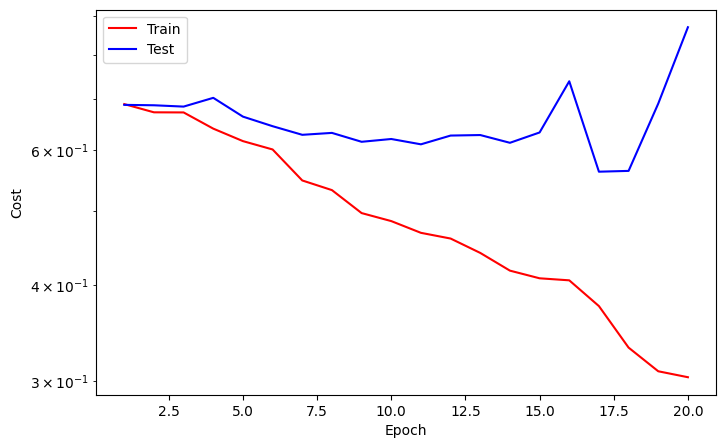

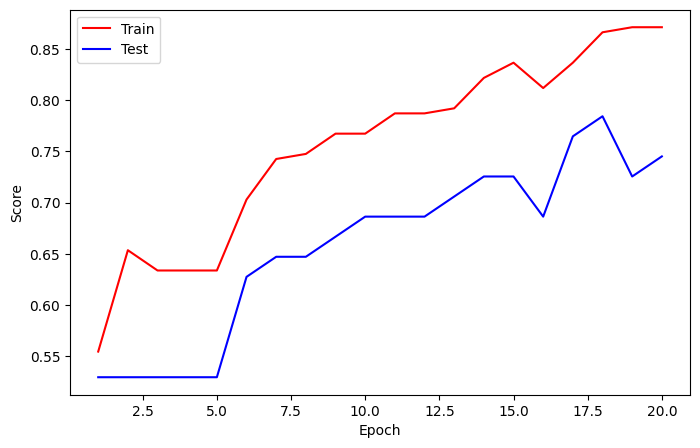

==> EarlyStop patience =  2 | Best test_score: 0.7843


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.2889 | Test_cost  = 0.4974 | Train_score = 0.8812 | Test_score = 0.7647 |
==> EarlyStop patience =  3 | Best test_score: 0.7843


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.2527 | Test_cost  = 0.5455 | Train_score = 0.8812 | Test_score = 0.7843 |
==> EarlyStop patience =  4 | Best test_score: 0.7843


Train:   0%|          | 0/4 [00:00<?, ?it/s]

Test:   0%|          | 0/1 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.1975 | Test_cost  = 0.6220 | Train_score = 0.9257 | Test_score = 0.7843 |
==> EarlyStop patience =  5 | Best test_score: 0.7843
==> Execute Early Stopping at epoch: 23 | Best test_score: 0.7843
==> Best model is saved at model_BrainTumorDetectionCNN


/usr/local/lib/python3.10/dist-packages/jcopdl/callback/_callback.py:104: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f'{self.outdir}/weights_best.pth

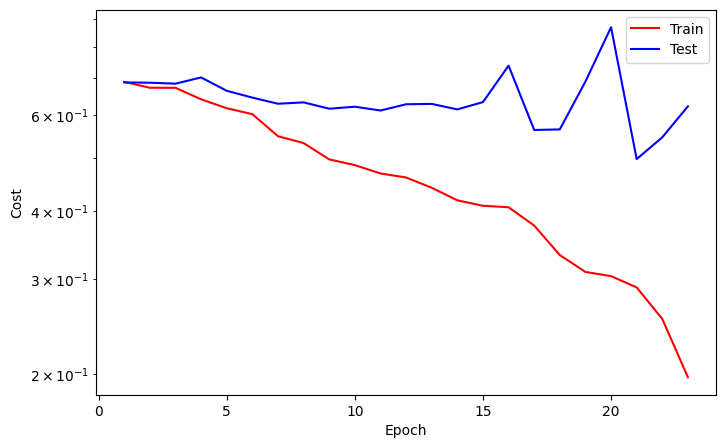

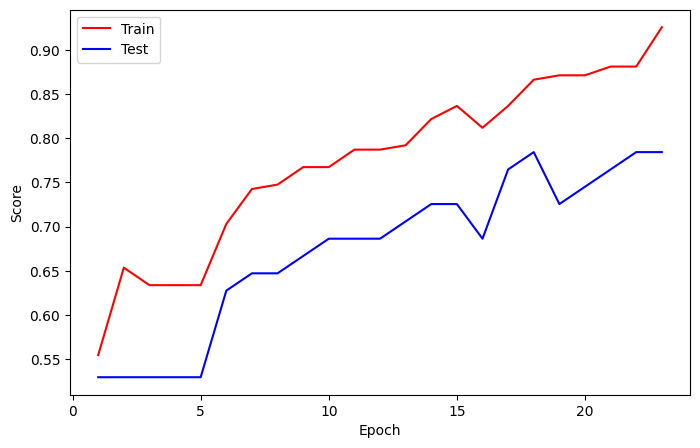

In [ ]:
while True:
  train_cost, train_score = loop_fn('train', train, trainloader, model, criterion, optimizer)
  with torch.no_grad():
    test_cost, test_score = loop_fn('test', test, testloader, model, criterion, optimizer)

  # Logging
  callback.log(train_cost, test_cost, train_score, test_score)

  # Checkpoint (optional)
  callback.save_checkpoint()

  # Runtime Plotting
  callback.cost_runtime_plotting()
  callback.score_runtime_plotting()

  # Early Stopping
  if callback.early_stopping(model, monitor='test_score'):
    callback.plot_cost()
    callback.plot_score()
    break

Prediction

In [ ]:
feature, target = next(iter(testloader))
with torch.no_grad():
  model.eval()
  output = model(feature)
  preds = output.argmax(1)
preds

tensor([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 0])